# Linear Regression
[Source](https://www.textbook.ds100.org/ch/13/linear_grad.html)

In [1]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# HIDDEN
tips = sns.load_dataset('tips')

In [3]:
# HIDDEN
def minimize(loss_fn, grad_loss_fn, x_vals, y_vals,
             alpha=0.0005, progress=True):
    '''
    Uses gradient descent to minimize loss_fn. Returns the minimizing value of
    theta once the loss changes less than 0.0001 between iterations.
    '''
    theta = np.array([0., 0.])
    loss = loss_fn(theta, x_vals, y_vals)
    while True:
        if progress:
            print(f'theta: {theta} | loss: {loss}')
        gradient = grad_loss_fn(theta, x_vals, y_vals)
        new_theta = theta - alpha * gradient
        new_loss = loss_fn(new_theta, x_vals, y_vals)
        
        if abs(new_loss - loss) < 0.0001:
            return new_theta
        
        theta = new_theta
        loss = new_loss

In [4]:
def simple_linear_model(thetas, x_vals):
    '''Returns predictions by a linear model on x_vals.'''
    return thetas[0] + thetas[1] * x_vals

def mse_loss(thetas, x_vals, y_vals):
    return np.mean((y_vals - simple_linear_model(thetas, x_vals)) ** 2)

In [5]:
def grad_mse_loss(thetas, x_vals, y_vals):
    n = len(x_vals)
    grad_0 = y_vals - simple_linear_model(thetas, x_vals)
    grad_1 = (y_vals - simple_linear_model(thetas, x_vals)) * x_vals
    return -2 / n * np.array([np.sum(grad_0), np.sum(grad_1)])

In [14]:
# minimize(loss_fn, grad_loss_fn, x_vals, y_vals)

In [6]:
%%time

thetas = minimize(mse_loss, grad_mse_loss, tips['total_bill'], tips['tip'])

theta: [0. 0.] | loss: 10.896283606557377
theta: [0.   0.07] | loss: 3.8937622006094705
theta: [0.  0.1] | loss: 1.9359443267168215
theta: [0.01 0.12] | loss: 1.388538448286097
theta: [0.01 0.13] | loss: 1.235459416905535
theta: [0.01 0.14] | loss: 1.1926273731479433
theta: [0.01 0.14] | loss: 1.1806184944517062
theta: [0.01 0.14] | loss: 1.177227251696266
theta: [0.01 0.14] | loss: 1.1762453624313751
theta: [0.01 0.14] | loss: 1.1759370980989148
theta: [0.01 0.14] | loss: 1.175817178966766
Wall time: 47.9 ms


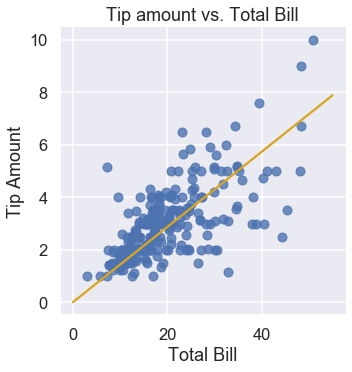

In [7]:
# HIDDEN
x_vals = np.array([0, 55])
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False)
plt.plot(x_vals, simple_linear_model(thetas, x_vals), c='goldenrod')
plt.title('Tip amount vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount');